In [4]:
import numpy as np
from scipy.io import wavfile
import warnings
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time

In [7]:
def get_fft_at_slice(start, duration, path, plot):

    fs, data = wavfile.read(path)
    time_slice = duration
    start_samples = int(start*fs)
    num_samples = int(time_slice * fs)

    transform_data = data[start_samples:start_samples + num_samples]
    a = transform_data.T[0]
    b = [(ele / 2 ** 8.) * 2 - 1 for ele in a]
    c = fft(b)
    d = int(len(c) / 2)

    if plot:
        d = 2000
        plt.plot(abs(c[:(d - 1)]), 'r')
        plt.show()
        return abs(c[:(d - 1)])
    else:
        return abs(c[:(d - 1)])


In [26]:

def gradient_descent_2(arr, guesses, max_iter, show_results, inititial_run, learning_rate=10):


    start_time = time.time()
    maxes = []

    for guess in guesses:
        dynamic_learning_rate = learning_rate
        index = guess
        max = arr[guess]
        max_index = guess
        for i in range(1, max_iter):
            if(index<0):
                index = 0
            dynamic_learning_rate = dynamic_learning_rate*0.999
            if(arr[index]>max):
                max_index = index
                max = arr[index]

            grad = (arr[index+1]/arr[index])
            if(grad < 1):
                grad = -1/grad
            index += int(grad*dynamic_learning_rate)
        maxes.append(max_index)

    if inititial_run==False:
        alt_return = maxes[np.argmax(arr[maxes])]
    else:
        alt_return = gradient_descent_2(arr, guesses=maxes, max_iter=20, show_results=False, inititial_run=False, learning_rate=learning_rate/2)[0]

    end_time = time.time()
    elapsed_time = end_time - start_time

    if(show_results == True):
        print("===== iteration results =====")
        print("max value found: ", max)
        print("maximum index: ", max_index)
        print("time elapsed: ", elapsed_time)
        print("============================")

    return [alt_return, max]


In [13]:
def plot_error_freq(arr, window_size, x_values):
    moving_avg = np.convolve(arr, np.ones(window_size) / window_size, mode='valid')
    #plt.plot(arr, label='Original Data')
    pad_left = (len(x_values) - len(moving_avg)) // 2
    pad_right = len(x_values) - len(moving_avg) - pad_left
    moving_avg = np.pad(moving_avg, (pad_left, pad_right), mode='constant', constant_values=0)

    plt.plot(x_values, moving_avg)
    plt.xlabel('FFT Chunk Size')
    plt.ylabel('Error')
    plt.title('Moving Average of Error Freq.')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def plot_errors(path):
    errors = []
    for slice_size in np.arange(0.05, 2, 0.005):
        for i in range(0, 1):
            slice = get_fft_at_slice(i, slice_size, path, plot=False)
            # print(len(slice))
            freq = gradient_descent_2(slice, guesses=[100, 200, 300, 400, 500], max_iter=300, show_results=False, inititial_run=True)
            true_value = np.argmax(slice)
            errors.append(abs(true_value-freq[0]))

    plot_error_freq(errors, 30, np.arange(0.05, 2, 0.005))
    print(errors)
    print("average error", np.sum(errors)/len(errors))
    x_values = np.arange(0.05, 2, 0.005)
    y_values = errors

    plt.plot(x_values, y_values)
    plt.xlabel('slice size')
    plt.ylabel('error')
    plt.title('Plot of errors')
    plt.grid(True)
    plt.show()

In [42]:
slice_size = 0.94
for i in range(0, 1):
    slice = get_fft_at_slice(i, slice_size, 'sample_1.wav', plot=False)
    #print(len(slice))
    freq = gradient_descent_2(slice, guesses=[100, 200, 300, 400], max_iter=200, inititial_run=True, show_results=True)
    print(freq)
    print("true value -> ", np.argmax(slice))

===== iteration results =====
max value found:  10449137522.074022
maximum index:  486
time elapsed:  0.0
[248, 10449137522.074022]
true value ->  493


C:\Users\hudso\AppData\Local\Temp\ipykernel_5028\4121391281.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)


C:\Users\hudso\AppData\Local\Temp\ipykernel_5028\4121391281.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


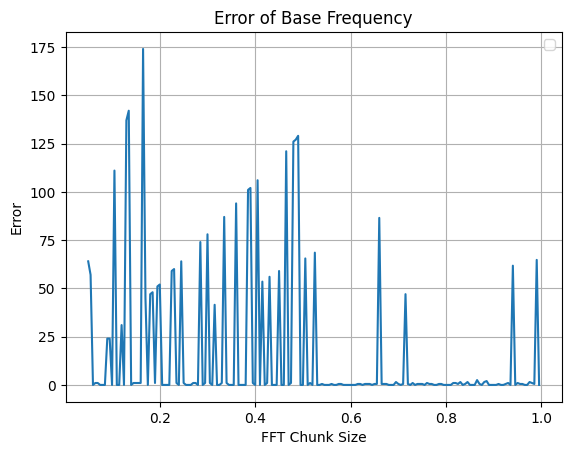

In [56]:
errors = []
x_range = np.arange(0.05, 1, 0.005)
for slice_size in x_range:
    for i in range(0, 1):
        slice = get_fft_at_slice(i, slice_size, 'sample_1.wav', plot=False)
        #print(len(slice))
        freq = gradient_descent_2(slice, guesses=[100, 200, 300, 400], max_iter=200, inititial_run=True, show_results=False)[0]
        true = np.argmax(slice)

        while freq > 280:
            freq = freq/2
        while true >280:
            true = true/2
        
        errors.append(abs(freq-true))

lot_error_freq(errors, 30, x_range)

C:\Users\hudso\AppData\Local\Temp\ipykernel_5028\4121391281.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


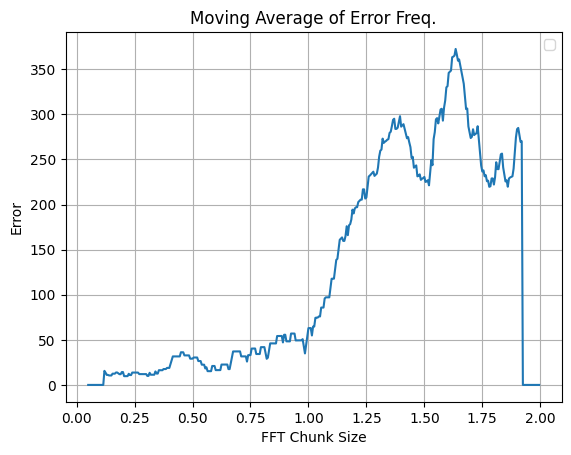

[63, 73, 0, 18, 1, 0, 0, 0, 1, 24, 1, 27, 29, 0, 0, 0, 137, 0, 0, 0, 1, 41, 1, 0, 0, 0, 0, 0, 0, 51, 1, 0, 0, 0, 0, 0, 60, 1, 0, 64, 0, 0, 0, 0, 70, 1, 0, 1, 0, 1, 78, 0, 0, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 103, 0, 0, 0, 0, 109, 0, 0, 113, 0, 0, 0, 118, 0, 0, 121, 0, 0, 126, 127, 129, 0, 0, 1, 0, 0, 0, 138, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 152, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 167, 0, 0, 0, 0, 173, 0, 0, 0, 1, 0, 0, 0, 184, 0, 1, 0, 0, 0, 0, 0, 194, 195, 198, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 214, 0, 1, 219, 0, 0, 2, 1, 1, 0, 0, 228, 0, 1, 0, 0, 1, 236, 237, 239, 0, 0, 0, 0, 0, 246, 0, 2, 0, 0, 0, 254, 2, 0, 0, 0, 0, 262, 0, 0, 0, 0, 0, 0, 1, 2, 2, 275, 0, 2, 279, 281, 281, 0, 2, 0, 297, 0, 291, 8, 0, 294, 0, 296, 0, 0, 300, 302, 0, 0, 0, 308, 310, 3, 0, 317, 311, 315, 312, 319, 321, 319, 165, 0, 164, 325, 1, 328, 329, 160, 331, 167, 167, 335, 3, 169, 342, 340, 0, 344, 0, 2, 347, 348, 349, 351, 355, 354, 357, 179, 357, 359, 363, 362, 365, 364, 365, 186, 368, 186, 371, 186, 374

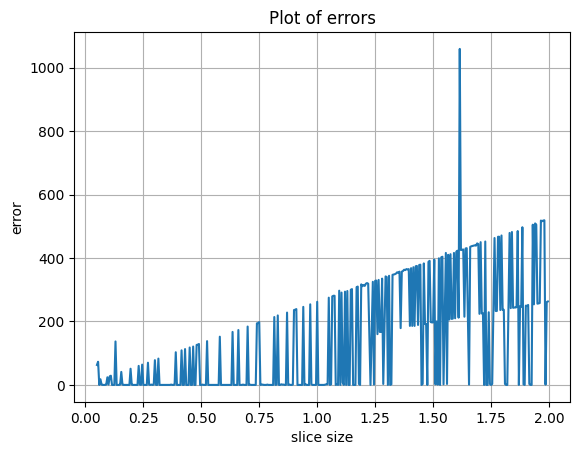

In [21]:
plot_errors("sample_1.wav")